In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shrooms = pd.read_csv('mushrooms.csv')

## Mutual information

In [3]:
shrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# homemade non-efficient, non-vectorized implementation from the formula
# mutual_info = sum_x sum_y  p(x, y)*log( p(x,y) / (p(x) * p(y)) )
def mutual_information(col1, col2):
    if ~isinstance(col1, pd.Series):
        col1 = pd.Series(col1)
    if ~isinstance(col2, pd.Series):
        col2 = pd.Series(col2)

    N = len(col1)
    mutual_info = 0
    for x in col1.unique():
        nx = (col1 == x).sum()
        for y in col2.unique():
            ny = (col2 == y).sum()
            
            nxy = ((col1 == x) & (col2 == y)).sum()
            
            # the if statement takes care of the fact that x*log(x) -> 0 when x -> 0
            mutual_info += 0 if nxy == 0 else nxy/N * np.log(N * nxy/(nx*ny))           
    return mutual_info

In [5]:
mutual_information(shrooms['odor'], shrooms['class'])

0.6280433159496358

In [6]:
shrooms.apply(lambda c: mutual_information(c, shrooms['class']), axis=0).sort_values()

veil-type                   0.000000
stalk-shape                 0.005210
gill-attachment             0.009818
veil-color                  0.016509
cap-surface                 0.019817
cap-color                   0.024987
ring-number                 0.026653
cap-shape                   0.033823
gill-spacing                0.069927
stalk-root                  0.093448
habitat                     0.108709
bruises                     0.133347
population                  0.139987
gill-size                   0.159531
stalk-color-below-ring      0.167337
stalk-color-above-ring      0.175952
stalk-surface-below-ring    0.188463
stalk-surface-above-ring    0.197357
ring-type                   0.220436
gill-color                  0.289027
spore-print-color           0.333199
odor                        0.628043
class                       0.692501
dtype: float64

#### Mutual information experiments

In [7]:
# Let's compare it to a normalized correlation
def ncorr(v1, v2):
    return np.correlate(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [9]:
t = np.linspace(0, 2*np.pi-0.01, 50)

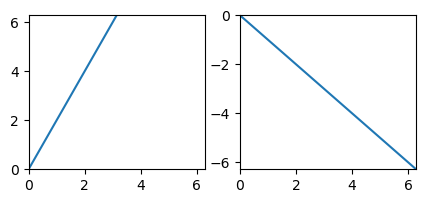

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))
ax1.plot(t, 2*t)
ax1.set_xlim([0,  2*np.pi]);
ax1.set_ylim([0, 2*np.pi]);
ax2.plot(t,-t)
ax2.set_xlim([0,  2*np.pi]);
ax2.set_ylim([-2*np.pi, 0]);

In [11]:
print(f'Correlation between t and 2t:    {ncorr(t, 2*t)[0]:.2f}')
print(f'Correlation between t and -t:    {ncorr(t, -t)[0]:.2f}')
print()
print(f'Mutual information in t and 2t:    {mutual_information(t, 2*t):.2f}')
print(f'Mutual information in t and -t:    {mutual_information(t, -t):.2f}')

Correlation between t and 2t:    1.00
Correlation between t and -t:    -1.00

Mutual information in t and 2t:    3.91
Mutual information in t and -t:    3.91


In [12]:
# Let's make x and y on a circle
x = np.cos(t)
y = np.sin(t)

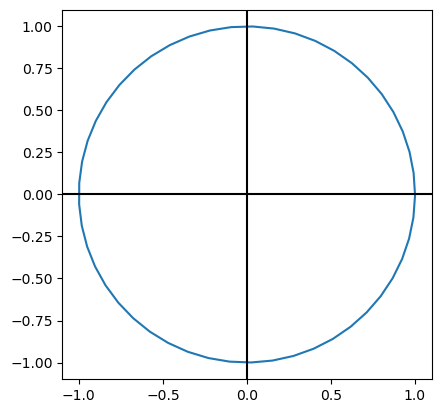

In [13]:
plt.plot(x, y)
plt.axis('square');
plt.plot([-1.25, 1.25], [0, 0], 'k')
plt.plot([0, 0], [-1.25, 1.25], 'k')

In [14]:
print(f'Correlation between cos(t) and itself:    {ncorr(x, x)[0]:.2f}')
print(f'Correlation between cos(t) and sin(t):    {ncorr(x, y)[0]:.2f}')
print()
print(f'Mutual information in cos(t) and itself:    {mutual_information(x, x):.2f}')
print(f'Mutual information in cos(t) and sin(t):    {mutual_information(x, y):.2f}')

Correlation between cos(t) and itself:    1.00
Correlation between cos(t) and sin(t):    -0.00

Mutual information in cos(t) and itself:    3.91
Mutual information in cos(t) and sin(t):    3.91


### There are methods in sklearn for it, of course

In [15]:
from sklearn.metrics.cluster import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score

In [16]:
xbin = pd.cut(x*3 + x**2 - np.exp(x), bins=500, labels=False)
ybin = pd.cut(y, bins=500, labels=False)

In [17]:
normalized_mutual_info_score(xbin, ybin)

0.9745632888700658

### Made for categorical

In [18]:
shrooms.apply(lambda c: mutual_information(c, shrooms['class']), axis=0).sort_values()

veil-type                   0.000000
stalk-shape                 0.005210
gill-attachment             0.009818
veil-color                  0.016509
cap-surface                 0.019817
cap-color                   0.024987
ring-number                 0.026653
cap-shape                   0.033823
gill-spacing                0.069927
stalk-root                  0.093448
habitat                     0.108709
bruises                     0.133347
population                  0.139987
gill-size                   0.159531
stalk-color-below-ring      0.167337
stalk-color-above-ring      0.175952
stalk-surface-below-ring    0.188463
stalk-surface-above-ring    0.197357
ring-type                   0.220436
gill-color                  0.289027
spore-print-color           0.333199
odor                        0.628043
class                       0.692501
dtype: float64

In [19]:
shrooms.apply(lambda c: normalized_mutual_info_score(c, shrooms['class']), axis=0).sort_values()

veil-type                   0.000000
stalk-shape                 0.007570
cap-color                   0.020546
cap-surface                 0.022210
gill-attachment             0.024168
cap-shape                   0.036801
veil-color                  0.039851
ring-number                 0.054168
stalk-root                  0.095548
habitat                     0.095811
gill-spacing                0.123258
population                  0.134528
stalk-color-below-ring      0.162175
stalk-color-above-ring      0.172926
bruises                     0.194480
gill-color                  0.206962
stalk-surface-below-ring    0.226749
gill-size                   0.243379
ring-type                   0.250985
stalk-surface-above-ring    0.256462
spore-print-color           0.300225
odor                        0.546078
class                       1.000000
dtype: float64

In [20]:
shrooms.apply(lambda c: mutual_info_score(c, shrooms['class']), axis=0).sort_values()

veil-type                   0.000000
stalk-shape                 0.005210
gill-attachment             0.009818
veil-color                  0.016509
cap-surface                 0.019817
cap-color                   0.024987
ring-number                 0.026653
cap-shape                   0.033823
gill-spacing                0.069927
stalk-root                  0.093448
habitat                     0.108709
bruises                     0.133347
population                  0.139987
gill-size                   0.159531
stalk-color-below-ring      0.167337
stalk-color-above-ring      0.175952
stalk-surface-below-ring    0.188463
stalk-surface-above-ring    0.197357
ring-type                   0.220436
gill-color                  0.289027
spore-print-color           0.333199
odor                        0.628043
class                       0.692501
dtype: float64